Tutorial 
https://medium.com/analytics-vidhya/music-classification-using-deep-learning-python-b22614adb7a2

In [1]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from tqdm import tqdm
import os

In [2]:
add_noise = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.7),
])
pitch_shift = Compose([
    PitchShift(min_semitones=-4, max_semitones=12, p=0.5),
])

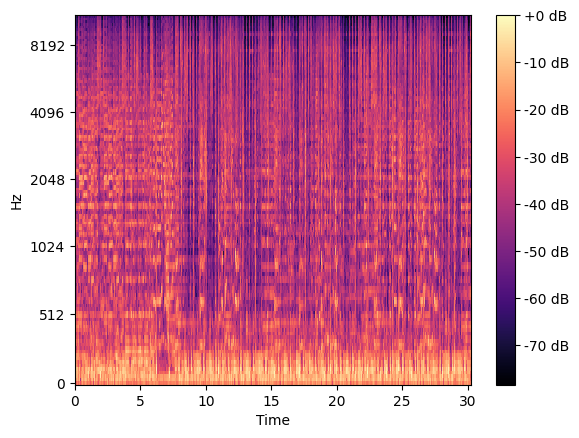

In [3]:
#setting melspec features
n_mels = 128
hop_length = 512
n_fft = 1024

y, sr = librosa.load("MusicGenre-dataset-test-2/genres_original/disco/disco.00003.wav")
#extract melspec features using librosa
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

#convert it to DB scale
S_DB = librosa.power_to_db(S, ref=np.max)

#display the spectrogram
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [4]:
#temporary list for the input data
data = []

#list to append all the labels
Y = []

base_path = 'MusicGenre-dataset-test-2/genres_original'

#looping through all label directories
for label in tqdm(os.listdir(base_path)):
    file_path = base_path + '/' + label
    
    #looping through each file in the directory
    for pth in os.listdir(file_path):
        
        try:
            final_path = file_path + '/' + pth

            #loading original file
            y, sr = librosa.load(final_path, duration=25.0)
            #appending data to a list
            data.append(y)
          

            #appending labels to the label list
            Y.append(label)
            
        except:
            print("Error in file", pth)
            pass
        
#converting list to a numpy array
X = np.stack(data)


100%|██████████| 10/10 [00:04<00:00,  2.00it/s]


In [5]:
from sklearn.model_selection import train_test_split
#split the data using the SkLearn library
audio_train, audio_test, y_train, y_test = train_test_split(\
     X, Y, test_size=0.20, random_state=6)

In [6]:
def get_melspec(audio, sr):
    n_mels = 128
    hop_length = 512
    n_fft = 1024
    #calculate the melspectogram of the provided audio wave
    S = librosa.feature.melspectrogram(y= audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    return S

In [7]:
# #temporary list for the input data
# X_train = []

# #list to append all the labels
# Y_train = []

# #looping through train data to create melspec and augment data
# for i, dat in tqdm(enumerate(audio_train)):
        
#     try:

#         #adding noise to the file
#         noisy_audio = add_noise(dat ,sr)
#         #changing pitch of the audio
#         pitch_audio = pitch_shift(dat, sr)

#         #generate melspec for original and augmented files
#         mel = get_melspec(dat, sr)
#         noise_mel = get_melspec(noisy_audio, sr)
#         pitch_mel = get_melspec(pitch_audio, sr)

#         #appending augmented data to original training data
#         X_train.append(mel)
#         Y_train.append(y_train[i])
#         X_train.append(noise_mel)
#         Y_train.append(y_train[i])
#         X_train.append(pitch_mel)
#         Y_train.append(y_train[i])


#     except Exception as e:
#         print("Error in file:", pth)
#         print("Error:", e)

In [8]:
#temporary list for the input data
X_test = []

#list to append all the labels
Y_test = []

#looping through train data to create melspec and augment data
for i, dat in tqdm(enumerate(audio_test)):
        
    try:
        #generate melspec for original and augmented files
        mel = get_melspec(dat, sr)
       
        #Appending test melspec to list
        X_test.append(mel)
        Y_test.append(y_test[i])
        

    except Exception as e:
        print("Error in file:", pth)
        print("Error:", e)

200it [00:06, 33.17it/s]


In [9]:
#converting the test and train data to numpy array
# X_train = np.stack(X_train)
X_test = np.stack(X_test)

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
# encoder.fit(Y_train)

# Y_train = encoder.transform(Y_train).reshape([len(Y_train), 1])

encoder = LabelEncoder()
encoder.fit(Y_test)

Y_test = encoder.transform(Y_test).reshape([len(Y_test), 1])

In [11]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [12]:
# #importing the keras modules
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GRU
# from keras.callbacks import Callback, EarlyStopping

# #Initiating the model as Sequential
# model = Sequential()

# #Adding the CNN layers along with some drop outs and maxpooling
# model.add(Conv2D(64, 2, activation = 'relu', input_shape = (X_train.shape[1:])))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.1))
# model.add(Conv2D(128, 2, activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.1))
# model.add(Conv2D(256, 2, activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (4,4)))
# model.add(Dropout(0.1))
# model.add(Conv2D(512, 2, activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (8,8),padding='same'))
# model.add(Dropout(0.1))

# #flattening the data to be passed to a dense layer
# model.add(Flatten())

# #Adding the dense layers
# model.add(Dense(2048, activation = 'relu'))
# model.add(Dense(1024, activation = 'relu'))
# model.add(Dense(256, activation = 'relu'))

# #final output layer with 10 predictions to be made
# model.add(Dense(10, activation = 'softmax'))

# '''
# Optimizer = Adam
# Loss = Sparse Categorical CrossEntropy
# '''
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [13]:
import tensorflow as tf

# Cesta k vašemu modelu uloženému ve formátu SavedModel
saved_model_dir = 'model_muj_savedmodel_googleColab_trained/'

# Načtení modelu
model = tf.saved_model.load(saved_model_dir)


In [26]:
test_data = X_test[1]

In [27]:
infer = model.signatures["serving_default"]

In [28]:
vstupni_tensor = tf.constant(test_data)

In [29]:
vstupni_tensor_reshaped = tf.expand_dims(vstupni_tensor, axis=0)  # Přidává "batch size" dimenzi
# vstupni_tensor_reshaped = tf.expand_dims(vstupni_tensor_reshaped, axis=-1)  # Přidává "channels" dimenzi

In [30]:
vysledek = infer(vstupni_tensor_reshaped)

In [31]:
vysledek

{'dense_3': <tf.Tensor: shape=(1, 10), dtype=float32, numpy=
 array([[1.0000000e+00, 1.5588566e-34, 6.2421688e-26, 4.1400396e-20,
         1.4359989e-18, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32)>}

## Vstupní data do modelu:
- Mono signál
- Vzorkofací frekvence = 22 050 Hz
- Délka analyzovaného úseku 25 s
- Výpočet mel shape = (128, 1077):

def get_melspec(audio, sr):
    n_mels = 128
    hop_length = 512
    n_fft = 1024
    #calculate the melspectogram of the provided audio wave
    S = librosa.feature.melspectrogram(y= audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    
    return S

- Vstupní data do modelu pak shape = (1, 128, 1077, 1)

## Výstupní data:
- shape = (1,10)
- V pořadí [blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, rock]
    